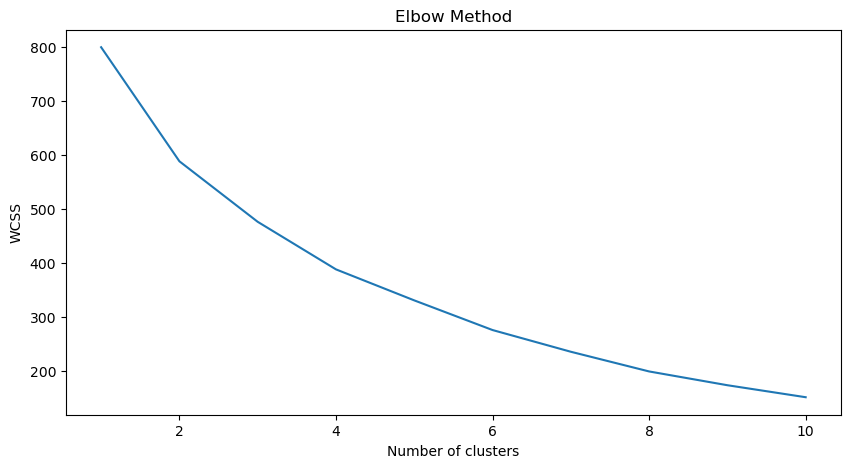

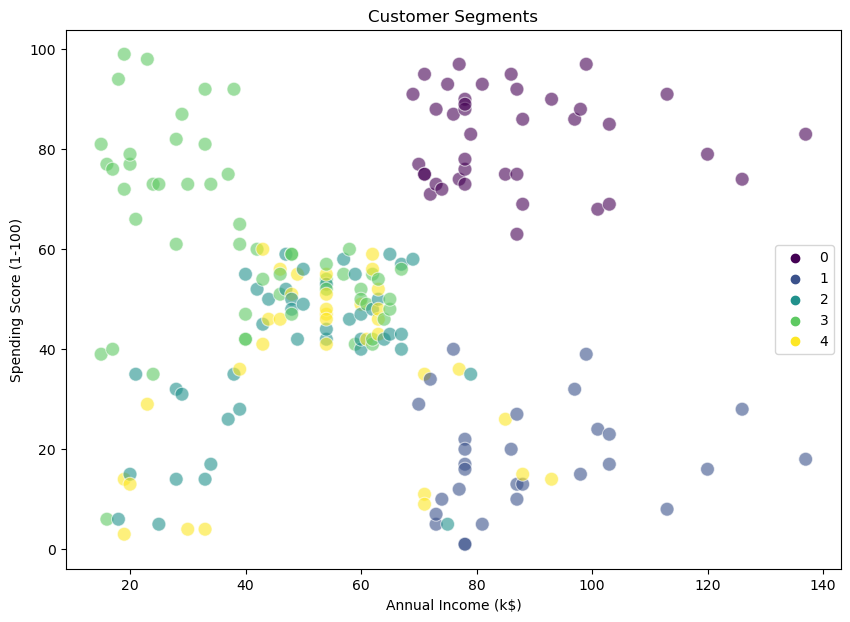

Cluster 0 Statistics:
          Gender        Age  Annual Income (k$)  Spending Score (1-100)
count  39.000000  39.000000           39.000000               39.000000
mean    0.538462  32.692308           86.538462               82.128205
std     0.505035   3.728650           16.312485                9.364489
min     0.000000  27.000000           69.000000               63.000000
25%     0.000000  30.000000           75.500000               74.500000
50%     1.000000  32.000000           79.000000               83.000000
75%     1.000000  35.500000           95.000000               90.000000
max     1.000000  40.000000          137.000000               97.000000


Cluster 1 Statistics:
          Gender        Age  Annual Income (k$)  Spending Score (1-100)
count  29.000000  29.000000           29.000000                29.00000
mean    0.551724  36.482759           89.517241                18.00000
std     0.506120   9.679214           17.418424                10.57963
min     0.000000  

In [1]:
# Step 1: Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# For ignoring warnings
import warnings
warnings.filterwarnings('ignore')

# Step 2: Load the Dataset
df = pd.read_csv('Mall_Customers.csv')
df.head()

# Step 3: Data Preprocessing
# Convert 'Gender' column to numerical values
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Select features for clustering
features = ['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = df[features]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Determine the Optimal Number of Clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Step 5: Apply K-means Clustering
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add the cluster column to the original dataframe
df['Cluster'] = clusters

# Step 6: Visualize the Clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='viridis', s=100, alpha=0.6)
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# Step 7: Analyze the Clusters
for i in range(5):
    print(f'Cluster {i} Statistics:')
    print(df[df['Cluster'] == i][features].describe())
    print('\n')
